<h1>Exploratory Data Analytics </h1>

<h2> IPL Dataset </h2>
    <p>IPL - Indian Premier League is a T-20 format of cricket league usually held between March and May.IPL is played between teams named after Indian states or cities. Players from all over the world participate in this league. IPL ranks $1^{st}$ as most attended cricket league and $4^{th}$ most attended sports league.<br><br> Being a cricket enthusiast, especially IPL this dataset would be my first choice to explore.

<h3>Features in the dataset</h3>
<h5> Matches played from 2008-2020 </h5>
<br>1. City            - Location of the match 
<br>2. Date            - On which the match was played 
<br>3. Player_of_match - Best player 
<br>4.Venue            - Name of the stadium 
<br>5.Team1 
<br>6.Team2 
<br>7.Toss_winner      - Result of the toss 
<br>8.Toss_decision    - Choice of the team to field or bat 
<br>9.Winner           - of the match
<br>10.Result          - match won with remaining runs or wickets
<br>11.Result_margin   - runs or wickets left
<br>12.Eliminator      - whether the macth was played in eliminator round
<br>13.Umpire1         - Umpier of the match
<br>14.Umpire2         - Umpier of the match
<br>15.Year            - Season



<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
fileLoc = r'C:\Users\varsh\Documents\MSc\1\PDA\Project\IPL\IPL Matches 2008-2020.csv'.replace("\\","/")
match = pd.read_csv(fileLoc)

<h3> Getting an overview of the Data </h3>

In [3]:
match.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [4]:
match.shape

(816, 17)

In [5]:
match.describe(include='all')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
count,8.160000e+02,803,816,812,816,816.000000,816,816,816,816,812,812,799.000000,812,19,816,816
unique,NaN,32,596,233,36,NaN,15,15,15,2,15,3,NaN,2,1,48,47
top,NaN,Mumbai,2011-04-24,AB de Villiers,Eden Gardens,NaN,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,N,D/L,HDPK Dharmasena,S Ravi
freq,NaN,101,2,23,77,NaN,108,106,106,496,120,435,NaN,799,19,78,84
mean,7.563496e+05,NaN,NaN,NaN,NaN,0.094363,NaN,NaN,NaN,NaN,NaN,NaN,17.321652,NaN,NaN,NaN,NaN
std,3.058943e+05,NaN,NaN,NaN,NaN,0.292512,NaN,NaN,NaN,NaN,NaN,NaN,22.068427,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,5.012278e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,7.292980e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,1.082626e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,NaN,NaN


<h3> Finding null value </h3>

In [6]:
ipl_na = match.isna().sum()
ipl_na[ipl_na>0]

city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64

### Treating null values
#### 1. City

There are few Na values in the city column but are only for 2 unique venues, hence can be filled appropriately

In [7]:
match[match.city.isna()].venue.value_counts()

Dubai International Cricket Stadium    7
Sharjah Cricket Stadium                6
Name: venue, dtype: int64

In [8]:
match.loc[match.venue == 'Dubai International Cricket Stadium', 'city'] = "Dubai"
match.loc[match.venue == 'Sharjah Cricket Stadium', 'city'] = "Sharja"

#### 2. Player of the match, Winner, Reuslt, eliminator

We can observe there are exactly 4 missing values in player_of_match winner result and eliminator rows on further examination of details we can see all Na values of diffrent columns are in same row, which could be due to uncompleted matches. Since there are very few such row we can remove it entierly.

In [9]:
match[match['winner'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


#### 3. Method
Also the method column has the most Na values hence it's wise to drop the entier column.

In [10]:
match = match.dropna(subset = ['winner'])
match = match.drop('method',axis =1)
match.shape

(812, 16)

#### 4. Result margin

Values of this column is found to be null when matches were tie. Therefore such values can be replaced with 0

In [11]:
nan_rows = match.loc [match.isna ().any (axis=1)]

In [12]:
match["result_margin"].fillna(0, inplace=True)
print()

#### Checking for remaining null values

In [13]:
ipl_na = match.isna().sum()
ipl_na[ipl_na>0]

Series([], dtype: int64)

#### Checking for duplicate values and correcting

In [14]:
match.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
match.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace = True)
match.replace('Delhi Daredevils','Delhi Capitals',inplace =True)
match.replace('Deccan Chargers','Sunrisers Hyderabad',inplace =True)
match.replace('Rising Pune Supergiants','Pune Warriors',inplace=True)

### Analysis of Data

In [16]:
match['Year'] = match['date'].apply(lambda x:x.split("-")[0])
match['Year'].unique()
match['Year'] = pd.to_numeric(match['Year'])

In [17]:
match_count=np.add(match['team1'].value_counts(),match['team2'].value_counts()).sort_values()

In [18]:
match_wins = match['winner'].value_counts().sort_values()

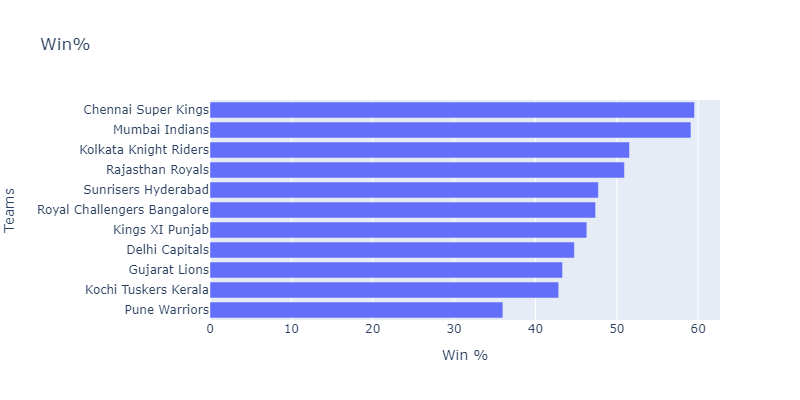

In [33]:
data =np.divide(match.winner.value_counts(),match_count).sort_values()*100
fig2=px.bar(data, y=data.index, x=data, title= "Win%",width=800, height=400)
fig2.update_layout(xaxis_title="Win %", yaxis_title="Teams")
fig2.show("png")

#### - Chennai  Super  Kings  leads  in  win  probability by having own almost 60% of the matches, followed by Mumbai Indians having win probability close to 59%.

#### - Pune warriors have lost most % of matches.

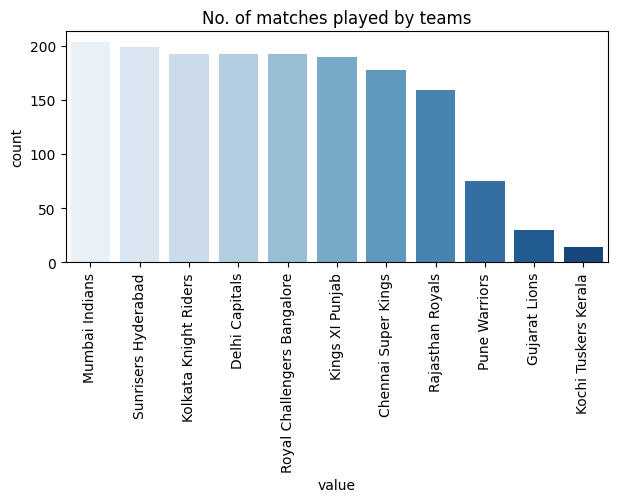

In [20]:
No_match = pd.melt(match, id_vars=['id'], value_vars=['team1', 'team2'])

plt.figure(figsize=(7,3))
ax=sns.countplot(x='value', data=No_match, order=No_match['value'].value_counts().index, orient='v', palette="Blues")
plt.xticks(rotation='vertical')
plt.title("No. of matches played by teams")
ax.grid(False)
plt.show()

#### - Mumbai Indians have played most matches through the leauge followed by Kolkata night riders.

#### - Kochi tuskers Kerala have played the least no. of matches


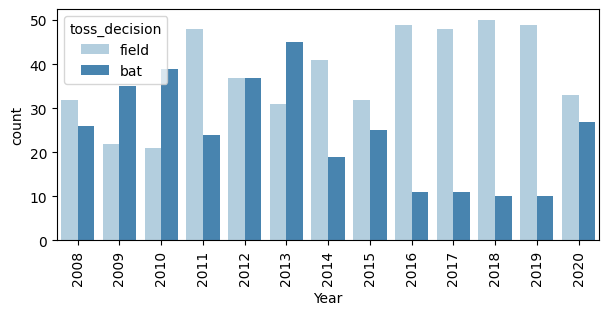

In [21]:
plt.figure(figsize=(7,3))
ax=sns.countplot(x='Year', hue='toss_decision', data=match, palette="Blues")
ax.grid(False)
plt.xticks(rotation='vertical')
plt.show()

#### There is a shift in preference over the years from opting to blow first to opting to chase the score

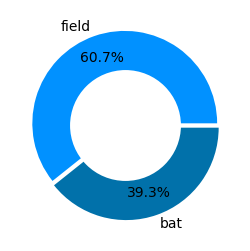

In [22]:
plt.figure(figsize=(3,3))
sizes = match.toss_decision.value_counts()
labels = match.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#0191FF','#0171AA'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=0,
         pctdistance=0.75,
         explode = (0.025,0.025))

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [23]:
winners = match.drop_duplicates(subset=['Year'], keep='last')[['Year', 'winner']].reset_index(drop=True)
winners.value_counts('winner')

winner
Mumbai Indians           5
Chennai Super Kings      3
Sunrisers Hyderabad      2
Kolkata Knight Riders    2
Rajasthan Royals         1
dtype: int64

#### Mumbai Indians have won the heighst no. of trophy followed by Chennai Super Kings

In [24]:
grp_yr=pd.DataFrame(match.groupby(['Year']).winner.value_counts())

In [25]:
grp_yr.rename(columns = {'winner':'wins'}, inplace = True)

In [26]:
grp_yr=grp_yr.reset_index()

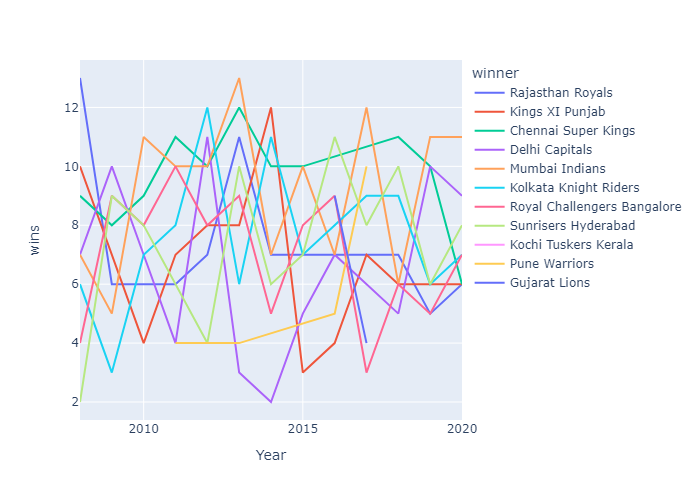

In [31]:
fig1=px.line(grp_yr, x="Year", y="wins", color="winner" )
fig1.show("png")

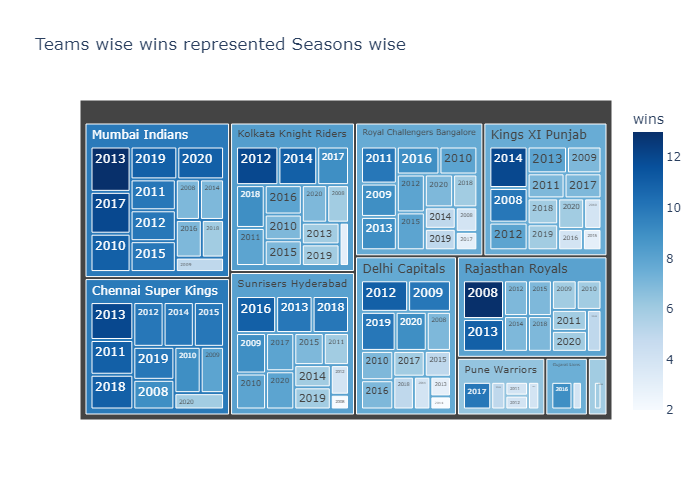

In [30]:
fig=px.treemap(grp_yr, path=['winner','Year'],title="Teams wise wins represented Seasons wise",values='wins',color='wins',labels="wins",color_continuous_scale="blues")
fig.show("png")

### Conclusion
- The above graph it is clear that Mumbai Indians have been performing great through  the league and Chennai Super kings have been in second position but this team had a break of two years, 2016 and 2017.
- Sunrisers Hyderabad is the most recently formed team in 2013.
- Royal Challengers Bangalore also has been through 2 bad season one in 2014  and another one in 2017.
- Rajasthan Royals and Kolkata Night rides have been maintaining consistent performance.<br>v.    Rajasthan Royals also had break of 2 years, 2016 and 2017.
- Least matches won by any team in a season is 3
- Most matches won by any team in a season is 13
- Chasing score is the most prefered choice of the teams
- Mumbai Indians have won the heighst no. of trophy followed by Chennai Super Kings
- There is a shift in preference over the years from opting to blow first to opting to chase the score
- Mumbai Indians have played most matches through the leauge followed by 
- Kolkata night riders.
- Kochi tuskers Kerala have played the least no. of matches¶
- Chennai Super Kings leads in win probability by having own almost 60% of the matches, followed by Mumbai Indians having win probability close to 59%.
- Pune warriors have lost most % of matches.